# **Sentiment Analysis on Corona Virus Tweets**

In [27]:
# import modules
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pickle import dump
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
# train dataset
train = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
test= pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")

In [3]:
# Combine datasets
train['train'] = 1
test['test'] = 0

In [4]:
combined = pd.concat([train, test]).reset_index(drop = True)

In [6]:
combined.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,train,test
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,1.0,NaN
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1.0,NaN
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1.0,NaN
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1.0,NaN
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,1.0,NaN


In [5]:
# inspect combined
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserName       44955 non-null  int64  
 1   ScreenName     44955 non-null  int64  
 2   Location       35531 non-null  object 
 3   TweetAt        44955 non-null  object 
 4   OriginalTweet  44955 non-null  object 
 5   Sentiment      44955 non-null  object 
 6   train          41157 non-null  float64
 7   test           3798 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.7+ MB


In [7]:
# replace nans in location
# Fill nan values with 'unknown'
combined['Location'].fillna('Unknown', inplace = True)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


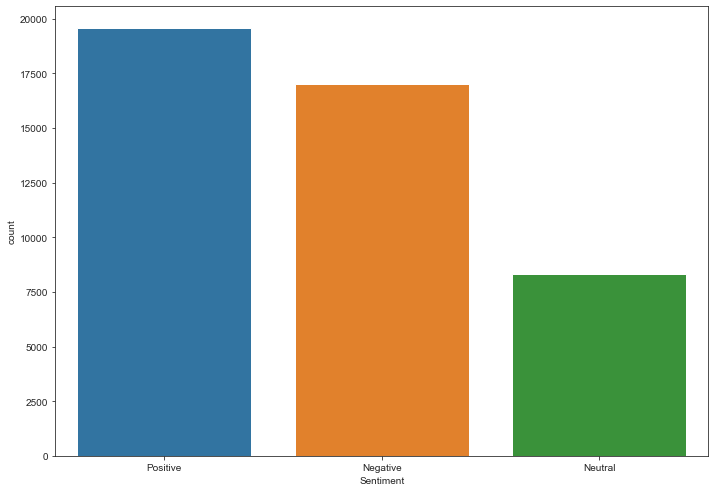

In [16]:
# Plot sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(combined['Sentiment'], order=combined['Sentiment'].value_counts(ascending=False).index, ax=ax)
plt.savefig('originalSentiments.png')
plt.show()

In [10]:
# check contribution of each category
sentiment_order=combined['Sentiment'].value_counts(normalize = True)
sentiment_order

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [11]:
# Positive and Negative make up half of the Sentiment values about 27% and 24% respectively.
# Extreme values both make up about 30% of the Sentiment while 18% make up Neutral Sentiments.
# This project will focus on binary text classification.
# Convert Extreme Sentiments to their respective lower values of Positive and Negative
# Neutral Values will be dropped

In [12]:
# replace the extreme values
combined.replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'}, inplace = True)

In [13]:
# Extract data with only positive and negative sentiments
ml_data_filtered =combined.loc[(combined['Sentiment'] == 'Positive') | (combined['Sentiment'] == 'Negative')].reset_index(drop = True)

In [14]:
# rename columns to class and text
df = ml_data_filtered.rename(columns = {'OriginalTweet': 'text', 'Sentiment': 'class'})
df.head()

,UserName,ScreenName,Location,TweetAt,text,class,train,test
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1.0,NaN
1,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1.0,NaN
2,3802,48754,Unknown,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1.0,NaN
3,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,1.0,NaN
4,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive,1.0,NaN


C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


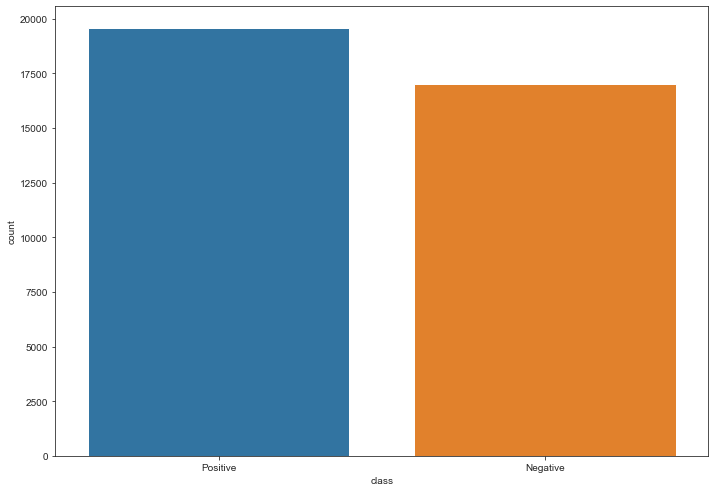

In [17]:
# Plot new sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(df['class'], order=df['class'].value_counts(ascending=False).index, ax=ax)
plt.savefig('binarySentiments.png')
plt.show()

In [18]:
# import sklearn libraries for machine learning models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 

In [21]:
# get list of labels for plotting confucion matrix
labels = df['class'].unique()
print(f'There are {len(labels)} labels in the dataset')

There are 2 labels in the dataset


In [22]:
# Text Preprocessing
# This project employs a two step text preprocessing:
# 1. CountVectorizer - This method transforms the text into a count (vector) of tokens.
# 2. TfidTransformer - This method transforms vector into a matrix by logging the tfd

In [23]:
# Count Vectorizer
cnt_vec = CountVectorizer(max_features=10000)
cnt_vec.fit(df['text'])
text_cnt_vec = cnt_vec.transform(df['text'])

In [24]:
# TFID Transformer
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_cnt_vec)

In [28]:
# Save preprocessing-transformation
dump(text_tfidf, open('text_tfidf.pkl', 'wb'))

In [31]:
# Separate data into respective training and test sets
X_train = text_tfidf[df['train'] == 1]
X_test = text_tfidf[df['test'] == 0]

y_train = df['class'][df['train'] == 1]
y_test = df['class'][df['test'] == 0]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33444, 10000), (3179, 10000), (33444,), (3179,))

In [29]:
# Logistic Regression
clf_lr = LogisticRegression(max_iter = 1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# cheeck the score
clf_lr_score = clf_lr.score(X_test, y_test)
print("Accuracy:", clf_lr_score)

Accuracy: 0.8480654293803083


In [ ]:
# An accuracy of ~85% is a good start. 
# Hyper parameter tuning will be applied to see if there is an improvement on the score

In [34]:
# prediction
clf_lr_predict = clf_lr.predict(X_test)

In [38]:
# Logistic Regression Gridsearch
grid_clf_lr = LogisticRegression(max_iter = 1000)
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_lr = GridSearchCV(grid_clf_lr, param_grid=grid_values)

In [39]:
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']})

In [40]:
# print best parameter after tuning 
print(grid_lr.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_lr.best_estimator_) 

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10, max_iter=1000)


In [41]:
# check performance
grid_lr_predictions = grid_lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_lr_predictions)) 

              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1633
    Positive       0.86      0.89      0.88      1546

    accuracy                           0.88      3179
   macro avg       0.88      0.88      0.88      3179
weighted avg       0.88      0.88      0.88      3179



In [42]:
# model accuracy improved from 85% to 88%

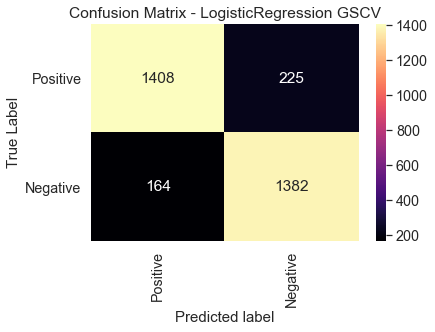

<Figure size 720x504 with 0 Axes>

In [44]:
# Plot confusion matrix

#import the relevant packages
from sklearn import metrics

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            grid_lr_predictions)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - LogisticRegression GSCV')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels, rotation = 90)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.savefig('cfm-lrGSCV.png')
plt.show()

In [45]:
# Save model
dump(grid_lr, open('grid_lr.pkl', 'wb'))

In [46]:
##############################################

In [47]:
# LinearSVC

In [48]:
# Instantiate the model
clf_lvc = LinearSVC()
clf_lvc.fit(X_train, y_train)

LinearSVC()

In [49]:
score_lvc = clf_lvc.score(X_test, y_test)
print(f'Accurace:', score_lvc)

Accurace: 0.8782636049072036


In [50]:
# Predict
clf_lvc_predict = clf_lvc.predict(X_test)

In [51]:
# Grid search for linearSVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000]}  
  
grid_lvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_lvc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.855, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.856, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.854, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.859, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.872, total=   0.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.876, total=   0.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.871, total=   0.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.877, total=   0.3s
[CV] C

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.819, total=   2.5s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.825, total=   4.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.814, total=   2.5s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.823, total=   2.2s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.825, total=   2.2s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.811, total=   2.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.818, total=   2.1s
[CV] C=1000 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.0s finished


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [52]:
# print best parameter after tuning 
print(grid_lvc.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_lvc.best_estimator_) 


{'C': 1}
LinearSVC(C=1)


In [53]:
# check performance
grid_lvc_predictions = grid_lvc.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_lvc_predictions)) 

              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1633
    Positive       0.86      0.89      0.88      1546

    accuracy                           0.88      3179
   macro avg       0.88      0.88      0.88      3179
weighted avg       0.88      0.88      0.88      3179



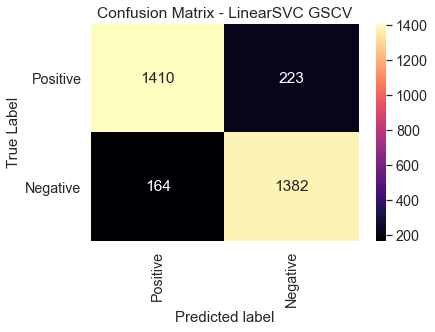

<Figure size 720x504 with 0 Axes>

In [55]:
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            grid_lvc_predictions)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - LinearSVC GSCV')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels, rotation = 90)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.savefig('cfm-lvcGSCV.png')
plt.show()

In [56]:
# little improvement from original model
# Save the model

dump(grid_lvc, open('grid_lsvc.pkl', 'wb'))

In [57]:
####################################################################

In [59]:
# RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
rf_score = rf.score(X_test, y_test)
print("Accuracy:", rf_score)

Accuracy: 0.7700534759358288


In [73]:
# Grid Search for Random Forest Classifier
# defining parameter range 

"""
param_grid = {
             'bootstrap': [True, False],
             'max_depth': [10, 20],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 5],
             'n_estimators': [100, 200]}  
  
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_rfc.fit(X_train, y_train)
"""


"\nparam_grid = {\n             'bootstrap': [True, False],\n             'max_depth': [10, 20],\n             'max_features': ['auto', 'sqrt'],\n             'min_samples_leaf': [1, 2],\n             'min_samples_split': [2, 5],\n             'n_estimators': [100, 200]}  \n  \ngrid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) \n  \n# fitting the model for grid search \ngrid_rfc.fit(X_train, y_train)\n"

In [71]:
"""
# print best parameter after tuning 
print(grid_rfc.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_rfc.best_estimator_) 
"""


{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200)


In [74]:
"""
# check performance
grid_rfc_predictions = grid_rfc.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_rfc_predictions)) 
"""


'\n# check performance\ngrid_rfc_predictions = grid_rfc.predict(X_test) \n\n# print classification report \nprint(classification_report(y_test, grid_rfc_predictions)) \n'

In [75]:
############################################

In [76]:
# Naive Bayes
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [77]:
clf_score = clf_nb.score(X_test, y_test)
print("Accuracy:", clf_score)

Accuracy: 0.7848379993708714
